<img src="https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/raw/main/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## Keras Regresión

# Redes neuronales de una sola capa oculta (ANN)

In [ ]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from  sklearn import  datasets

In [ ]:
# Keras no posee la metrica "r2_score" out-bot-the-box
from tensorflow.keras import backend as K

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## 1 - Perceptron

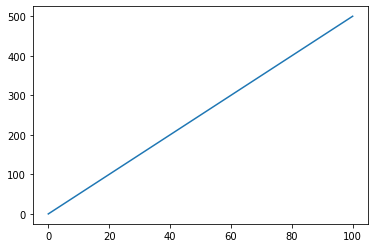

In [ ]:
# Ensayar el percepton con una recta
X = np.linspace(0, 100, 100)
y = 5*X

plt.plot(X, y)
plt.show()

In [ ]:
# Preparar los datos
# 1- Mezclar los datos (shuffle)
p = np.random.permutation(len(X))
X_train = X[p].reshape(-1, 1)
y_train = y[p]

In [ ]:
from tensorflow.keras.layers import Dense

# Crear un modelo secuencial
model = Sequential()

# Crear una capa de una reurona, con una sola entrada -> input_shape=(1,)
model.add(Dense(units=1, input_shape=(1,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
              loss='mean_squared_error',
              metrics=r2_keras)

history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
4/4 [==============================] - 1s 3ms/step - loss: 122019.5469 - r2_keras: -4.4797
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 114254.0234 - r2_keras: -5.2589
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 106762.8828 - r2_keras: -3.8554
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 99245.8125 - r2_keras: -3.7271
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 92340.3281 - r2_keras: -3.2820
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 86073.0000 - r2_keras: -3.4574
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 79715.0859 - r2_keras: -3.0965
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 74052.0312 - r2_keras: -2.9753
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 68503.6328 - r2_keras: -2.8533
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 63235.9766 - r2_k

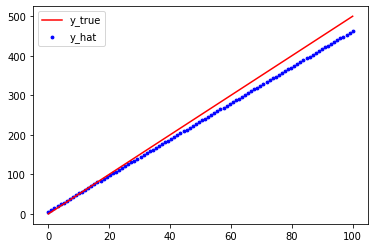

In [ ]:
y_hat = model.predict(X_train)
plt.plot(X, y, c='r', label="y_true")
plt.scatter(X_train, y_hat, c='b', s=8, label="y_hat")
plt.legend()
plt.show()

## 2 - Regresión

In [ ]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

from keras.layers import Dense

def create_model(input_size, hidden_neurons, output_size):
    # Crear un modelo secuencial
    model = Sequential()

    # Crear la capa de entrada y la capa oculta (hidden) de la red, que tendrá:
    # --> tantas entradas (input_shape) como columnas (input_size)
    # --> tantas neuronas como deseemos
    # --> utilizamos "sigmoid" como capa de activación
    model.add(Dense(units=hidden_neurons, activation='linear', input_shape=(input_size,)))

    # Crear la capa de salida, que tendrá tantas neuronas como salidas posibles
    model.add(Dense(units=output_size, activation='linear'))

    return model

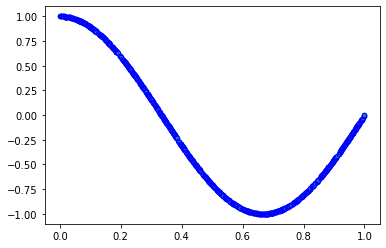

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)

n_samples = 1000

X_train = np.sort(np.random.rand(n_samples))
y_train = true_fun(X_train)# + np.random.randn(n_samples) * 0.1

X_test = np.linspace(0, 1, 100)
y_test = true_fun(X_test)

plt.scatter(X_train, y_train, edgecolor='b', s=20, label="data")

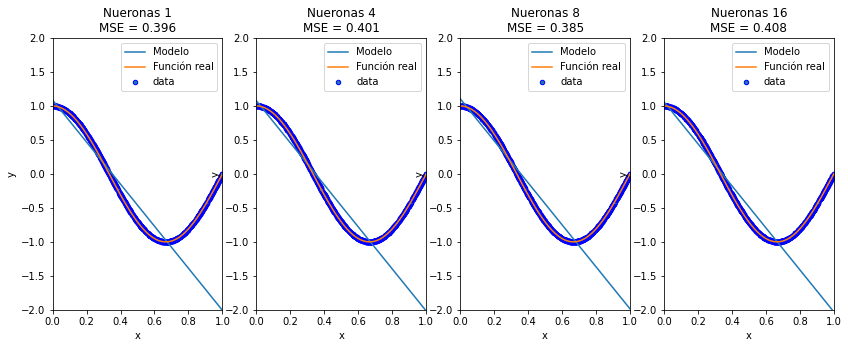

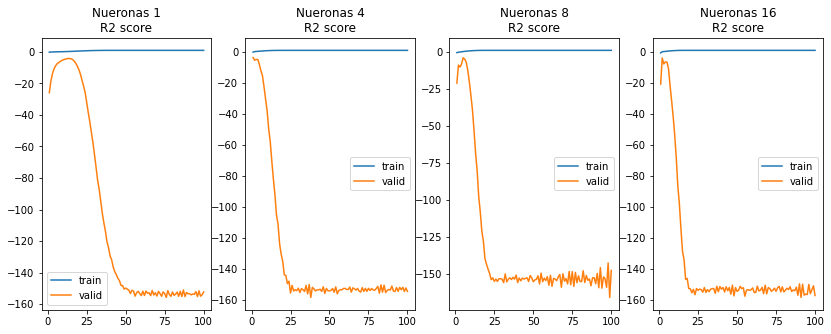

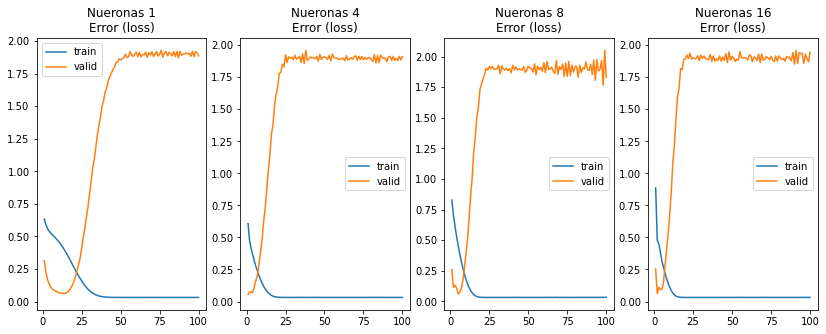

In [ ]:
from sklearn.metrics import mean_squared_error

mse_train_list = []
mse_test_list = []
history_list = []
nuerons_to_plot = [1, 4, 8, 16]

plot_number = 1

fig1 = plt.figure(figsize=(14, 5))
fig2 = plt.figure(figsize=(14, 5))
fig3 = plt.figure(figsize=(14, 5))

for neurons in nuerons_to_plot:

    ax = fig1.add_subplot(1, len(nuerons_to_plot), plot_number)
    ax2 = fig2.add_subplot(1, len(nuerons_to_plot), plot_number)
    ax3 = fig3.add_subplot(1, len(nuerons_to_plot), plot_number)
    #plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures()
    poly = PolynomialFeatures(degree=1)
    
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))

    model = create_model(input_size=2, hidden_neurons=neurons, output_size=1)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss='mean_squared_error',
              metrics=[r2_keras])

    history = model.fit(X_train_poly, y_train, validation_split=0.2, epochs=100, batch_size=100, verbose=0)
    y_hat = model.predict(X_test_poly)
    y_hat_train = model.predict(X_train_poly)

    mse = mean_squared_error(y_test, y_hat)
    mse_train = mean_squared_error(y_train, y_hat_train)

    mse_train_list.append(mse_train)
    mse_test_list.append(mse)
    history_list.append(history)

    ax.plot(X_test, y_hat, label="Modelo")
    ax.plot(X_test, y_test, label="Función real")
    ax.scatter(X_train, y_train, edgecolor='b', s=20, label="data")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim((0, 1))
    ax.set_ylim((-2, 2))
    ax.legend(loc="best")
    ax.set_title("Nueronas {}\nMSE = {:.3f}".format(neurons, mse))

    epoch_count = range(1, len(history.history['r2_keras']) + 1)
    ax2.plot(epoch_count, history.history['r2_keras'], label='train')
    ax2.plot(epoch_count, history.history['val_r2_keras'], label='valid')
    ax2.legend()
    ax2.set_title("Nueronas {}\nR2 score".format(neurons))

    ax3.plot(epoch_count, history.history['loss'], label='train')
    ax3.plot(epoch_count, history.history['val_loss'], label='valid')
    ax3.legend()
    ax3.set_title("Nueronas {}\nError (loss)".format(neurons))

    plot_number += 1

plt.show()

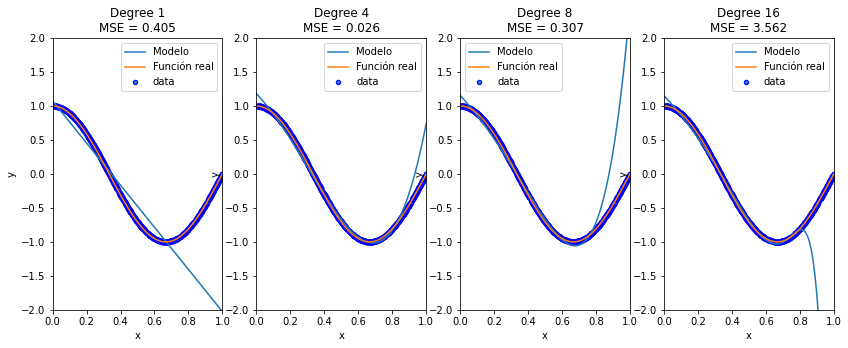

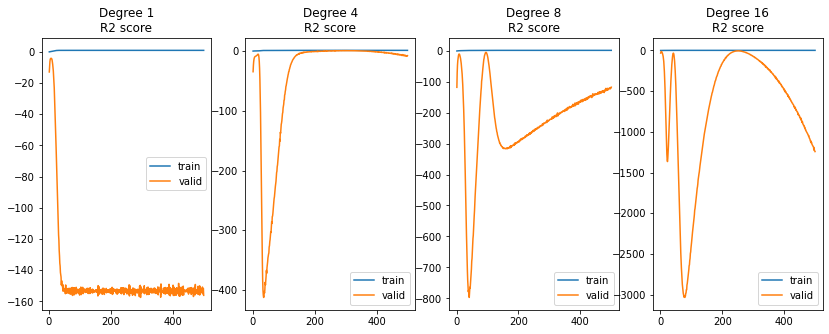

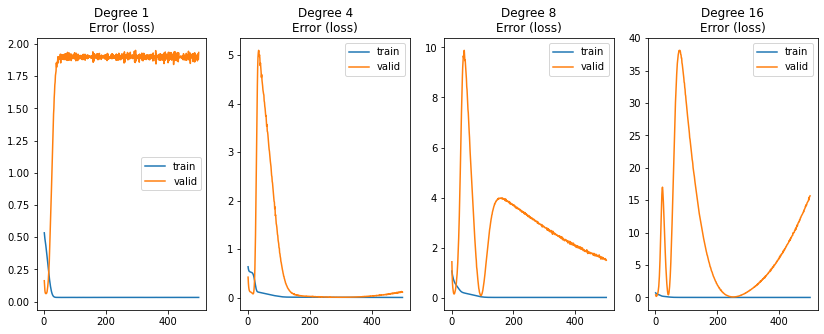

In [ ]:
from sklearn.metrics import mean_squared_error

mse_train_list = []
mse_test_list = []
history_list = []
degrees_to_plot = [1, 4, 8, 16]

plot_number = 1

fig1 = plt.figure(figsize=(14, 5))
fig2 = plt.figure(figsize=(14, 5))
fig3 = plt.figure(figsize=(14, 5))

for degree in degrees_to_plot:

    ax = fig1.add_subplot(1, len(degrees_to_plot), plot_number)
    ax2 = fig2.add_subplot(1, len(degrees_to_plot), plot_number)
    ax3 = fig3.add_subplot(1, len(degrees_to_plot), plot_number)
    #plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures()
    poly = PolynomialFeatures(degree=degree)
    
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))

    model = create_model(input_size=X_train_poly.shape[1], hidden_neurons=1, output_size=1)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss='mean_squared_error',
              metrics=[r2_keras])

    history = model.fit(X_train_poly, y_train, validation_split=0.2, epochs=500, batch_size=100, verbose=0)
    y_hat = model.predict(X_test_poly)
    y_hat_train = model.predict(X_train_poly)

    mse = mean_squared_error(y_test, y_hat)
    mse_train = mean_squared_error(y_train, y_hat_train)

    mse_train_list.append(mse_train)
    mse_test_list.append(mse)
    history_list.append(history)

    ax.plot(X_test, y_hat, label="Modelo")
    ax.plot(X_test, y_test, label="Función real")
    ax.scatter(X_train, y_train, edgecolor='b', s=20, label="data")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim((0, 1))
    ax.set_ylim((-2, 2))
    ax.legend(loc="best")
    ax.set_title("Degree {}\nMSE = {:.3f}".format(degree, mse))

    epoch_count = range(1, len(history.history['r2_keras']) + 1)
    ax2.plot(epoch_count, history.history['r2_keras'], label='train')
    ax2.plot(epoch_count, history.history['val_r2_keras'], label='valid')
    ax2.legend()
    #ax2.set_xlim(25, 180)
    ax2.set_title("Degree {}\nR2 score".format(degree))

    ax3.plot(epoch_count, history.history['loss'], label='train')
    ax3.plot(epoch_count, history.history['val_loss'], label='valid')
    ax3.legend()
    #ax3.set_xlim(25, 180)
    ax3.set_title("Degree {}\nError (loss)".format(degree))

    plot_number += 1

plt.show()